In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pyswarm import pso
from scipy.optimize import minimize, NonlinearConstraint


In [225]:
chips_data = pd.read_csv("chips.csv", header=None)[1:]
chips_X = chips_data.loc[:, 0:1]
chips_y = np.where(chips_data.loc[:, 2] == 'P', 1, -1).astype(np.int8)

In [226]:
geyser_data = pd.read_csv("geyser.csv", header=None)[1:]
geyser_X = geyser_data.loc[:, 0:1]
geyser_y = np.where(geyser_data.loc[:, 2] == 'P', 1, -1).astype(np.int8)

In [227]:
class SVM:
    X_train = None
    y_train = None
    X_test = None
    y_test = None


    def fit(self, X, y, kernel_name='linear', C=1, d=1, xi=1):
        self.X_train = np.array(X, dtype=np.float)
        self.y_train = np.array(y)
        self.N_train = self.X_train.shape[0]
        self.k_train = self.X_train.shape[1]
        self.C = C
        self.w0 = np.random.random()

        def gaussian(a, b):
            res = np.empty((0, b.shape[0]))
            for row_a in a:
                res = np.append(res, np.array((row_a-b).sum(axis=1).reshape((1, -1))), axis=0)
            print(res.shape)
            return res

        kernels = {
            'linear': lambda a, b: a @ b.T,
            'polynomial': lambda a, b: (a @ b.T + 1)**d,
            'gaussian': lambda a, b: np.exp(-xi * gaussian(a, b)**2),
        }
        self.kernel = kernels[kernel_name]
        self.__train__()


    def predict(self, X):
        return np.sign(self.K(X))

    def __possitive_cut__(self, x):
        return (x + np.abs(x))/2

    def K(self, X=None, w0=None):
        X = X if X is not None else self.X_train
        w0 = w0 if w0 is not None else self.w0
        return  (self.lamd * self.y_train * self.kernel(X, self.X_train)).sum(axis=1) - w0


    def __opt_func__(self, lamd):
        a = lamd.reshape((-1,1))
        b = self.y_train.reshape((-1,1))
        return .5 * (a*a.T * b*b.T * self.kernel(self.X_train, self.X_train)).sum() - a.sum()

    def __constraints__(self, lamd):
        return (lamd*self.y_train).sum()

    def __train__(self):
        # ub = np.full(self.N_train, self.C)
        # lb = np.full(self.N_train, 0)
        # self.lamd, fopt = pso(self.__opt_func__, lb=lb, ub=ub, f_ieqcons=self.__constraints__, swarmsize=100, maxiter=1000)
        # print((self.lamd*self.y_train).sum())
        # print(fopt)
        # self.w = np.array([(self.lamd * self.y_train * self.X_train[:, 0]).sum(axis=0), (self.lamd * self.y_train * self.X_train[:, 1]).sum(axis=0)])
        # print(self.K())
        # print(self.K(w0=1))
        # print(self.K(w0=0))
        # self.w0 = (self.w @ self.X_train.T - self.y_train)[np.where(self.lamd>0)[0][0]]
        # print(self.w0)
        # bounds = np.full((self.N_train, 2), (0, self.C))
        # constraints = NonlinearConstraint(self.__constraints__, 0, 0)
        # res = minimize(self.__opt_func__, np.random.sample(self.N_train)*self.C, method='trust-constr', constraints=constraints, bounds=bounds)
        # print(res)
        self.lamd = [9.99999289e-01, 9.99998998e-01, 9.99999285e-01, 9.99998372e-01,
       9.99999520e-01, 9.99999440e-01, 9.99997973e-01, 9.99999115e-01,
       9.99999002e-01, 9.99999566e-01, 9.99999712e-01, 9.99999737e-01,
       9.99999548e-01, 9.99999712e-01, 9.99999698e-01, 9.99999357e-01,
       3.53638107e-06, 9.99999679e-01, 9.99999261e-01, 9.99999658e-01,
       9.99999773e-01, 9.99999721e-01, 9.99999750e-01, 9.99999740e-01,
       9.99999439e-01, 9.99999734e-01, 9.99999713e-01, 9.99999822e-01,
       1.68641325e-06, 9.99999677e-01, 9.99999839e-01, 9.99999655e-01,
       9.99998553e-01, 2.32112038e-06, 2.34195707e-06, 1.38897219e-06,
       9.99998261e-01, 8.15786871e-07, 5.25596015e-07, 9.99998631e-01,
       9.02100386e-07, 4.43280079e-01, 9.99999446e-01, 1.15632485e-06,
       9.99999420e-01, 9.99999349e-01, 9.99999837e-01, 1.07007277e-05,
       9.99999776e-01, 9.99999695e-01, 5.35123742e-01, 4.85550034e-07,
       1.55213389e-06, 6.04656022e-07, 4.97481874e-07, 9.99997900e-01,
       7.59606928e-07, 9.99996427e-01, 9.99999143e-01, 9.99999744e-01,
       9.99999831e-01, 9.99998608e-01, 1.33829845e-06, 9.99999457e-01,
       8.27931196e-01, 4.53730990e-07, 9.99999260e-01, 1.42701586e-06,
       9.99994395e-01, 9.99999500e-01, 9.99999013e-01, 9.99999046e-01,
       8.01013690e-06, 1.21470518e-01, 2.23171340e-06, 9.99999660e-01,
       9.99999830e-01, 9.99999762e-01, 9.99998055e-01, 9.99997314e-01,
       9.99999770e-01, 9.99999800e-01, 9.99999474e-01, 9.99999782e-01,
       3.60788882e-07, 9.99999450e-01, 9.99999362e-01, 9.99999019e-01,
       9.99999793e-01, 9.99999425e-01, 9.99998803e-01, 9.99999680e-01,
       9.99999791e-01, 9.99999565e-01, 9.99999183e-01, 5.96583431e-07,
       2.55095071e-07, 9.99999072e-01, 2.04445390e-07, 2.34101701e-07,
       4.70311744e-06, 2.63219968e-07, 9.99999701e-01, 3.92340135e-01,
       9.99999836e-01, 9.99999556e-01, 9.99999793e-01, 9.99999876e-01,
       9.99999638e-01, 7.65089854e-06, 4.86680185e-07, 6.36657185e-01,
       4.72147308e-06, 9.99999408e-01, 9.99999765e-01, 1.39410560e-06,
       9.99998807e-01, 9.99999843e-01]
        print((self.lamd*self.y_train).sum())
        w = np.array([(self.lamd * self.y_train * self.X_train[:, 0]).sum(axis=0), (self.lamd * self.y_train * self.X_train[:, 1]).sum(axis=0)])

        print(np.where(self.y_train * self.K(w0 = 0) == 1))
        self.w0 = (w @ self.X_train.T - self.y_train)[0]
        self.w0=-1.5
        print(self.w0)



    def visualize(self):
        X = self.X_train
        y = self.y_train
        xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000), np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000))
        pred = self.predict(np.c_[xx.ravel(), yy.ravel()])
        pred = pred.reshape(xx.shape)

        plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))

        plt.scatter(X[:,0], X[:,1], c=y)
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.show()


In [228]:
svm = SVM()


In [229]:
# for C in [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]:
# svm.fit(geyser_X, geyser_y)
# svm.visualize()

4.036424527953386e-10
(array([], dtype=int64),)
-1.5


<ipython-input-227-f617026ed19e>:115: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))


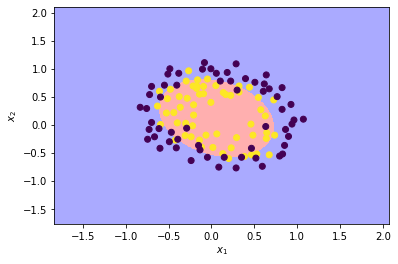

In [230]:
# for C in [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]:
# for i in range(2, 6):
svm.fit(chips_X, chips_y, kernel_name='polynomial', d=2)
svm.visualize()

In [231]:
# for i in range(1, 6):
#     svm.fit(chips_X, chips_y, kernel_name='gaussian', xi=i)
#     svm.visualize()
# print(svm.predict(np.array(geyser_X, dtype=np.float)))
# print(geyser_y)